# Relax Data Science Challenge

## Part - 1: EDA

In [1]:
# Loading all the required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import timedelta

### 1. Loading dataset in a DataFrame

In [2]:
user_df = pd.read_csv('takehome_users.csv', encoding='latin-1')
engage_df = pd.read_csv('takehome_user_engagement.csv')

### 2. Exploring Data & Data Cleaning

In [3]:
user_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


We can drop the Name and email columns as they are of no use to us.

In [4]:
user_df.drop(columns=['name', 'email'], inplace=True)
user_df.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
engage_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
# Checking the shape of the dataframe
user_df.shape

(12000, 8)

In [7]:
engage_df.shape

(207917, 3)

In [8]:
# Checking the summary statistics of the Dataframe
user_df.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [9]:
engage_df.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [10]:
# Checking the data types contained in the Dataframe
user_df.dtypes

object_id                       int64
creation_time                  object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

Lets convert 'creation_time' and  'last_session_creation_time' to datetime type

In [11]:
user_df['creation_time'] = pd.to_datetime(user_df['creation_time'])
user_df['last_session_creation_time'] = pd.to_datetime(user_df['last_session_creation_time'], unit = 's')
user_df.dtypes

object_id                              int64
creation_time                 datetime64[ns]
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
dtype: object

In [12]:
engage_df.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

Lets convert 'time_stamp' to datetime type

In [13]:
engage_df['time_stamp'] = pd.to_datetime(engage_df['time_stamp'])
engage_df.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

We need to check if a user logged in on 3 different days within a week.

In [14]:
# Since we need 3 different days of login, we can drop all the entries of a user having more than 1 login on a day
# lets convert time_stamp to dates and drop time_stamp
engage_df['date'] = engage_df['time_stamp'].dt.date
engage_df.drop(columns=['time_stamp'], inplace = True)

In [15]:
def login(df):
    df = df.drop_duplicates(subset='date').sort_values('date')
    days = df['date'].diff(periods = 2)
    return any(days <= timedelta(days = 7))

In [16]:
adopted = engage_df.groupby('user_id').apply(login)
adopted.name = 'user'

In [17]:
# Number of Adopted users
sum(adopted)

1656

In [18]:
# Checking for Null values
user_df.isnull().sum()

object_id                        0
creation_time                    0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

Since there are nearly 30% data missing for invited_by_user_id column, we can drop it.

In [19]:
user_df.drop(columns='invited_by_user_id', inplace=True)

In [20]:
user_df.isnull().sum()

object_id                        0
creation_time                    0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
dtype: int64

Lets create a new feature age which corresponds to the age of the account

In [21]:
user_df['age'] = user_df['last_session_creation_time'] - user_df['creation_time']
# Drop the above 2 columns
user_df.drop(columns=['last_session_creation_time', 'creation_time'], inplace = True)

# Convert the Age in days
user_df['age'] = user_df['age'].dt.days
user_df.head()

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,age
0,1,GUEST_INVITE,1,0,11,0.0
1,2,ORG_INVITE,0,0,1,136.0
2,3,ORG_INVITE,0,0,94,0.0
3,4,GUEST_INVITE,0,0,1,1.0
4,5,GUEST_INVITE,0,0,193,5.0


Lets merge both the dataframes and then visuaize them

In [22]:
user_df.set_index('object_id', inplace=True)
user_df.index.name = 'user_id'
df = user_df.join(adopted,on='user_id', how='inner')
df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,age,user
user_id,,,,,,
1,GUEST_INVITE,1,0,11,0.0,False
2,ORG_INVITE,0,0,1,136.0,True
3,ORG_INVITE,0,0,94,0.0,False
4,GUEST_INVITE,0,0,1,1.0,False
5,GUEST_INVITE,0,0,193,5.0,False


In [25]:
# lets convert user column to integer type
df['user'] = df['user'].astype(int)
df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,age,user
user_id,,,,,,
1,GUEST_INVITE,1,0,11,0.0,0
2,ORG_INVITE,0,0,1,136.0,1
3,ORG_INVITE,0,0,94,0.0,0
4,GUEST_INVITE,0,0,1,1.0,0
5,GUEST_INVITE,0,0,193,5.0,0


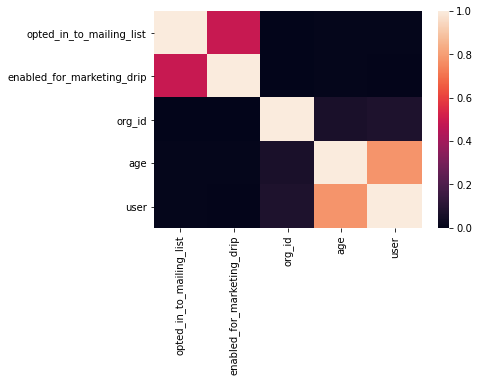

In [28]:
# Lets check the correlation between different features
sns.heatmap(df.corr())
plt.show()

In [31]:
df.corr()['user'].sort_values(ascending=False)

user                          1.000000
age                           0.777844
org_id                        0.077748
opted_in_to_mailing_list      0.007485
enabled_for_marketing_drip    0.004290
Name: user, dtype: float64

### From the above Correlation map it is clear that age of the account is the most important factor for user adoption

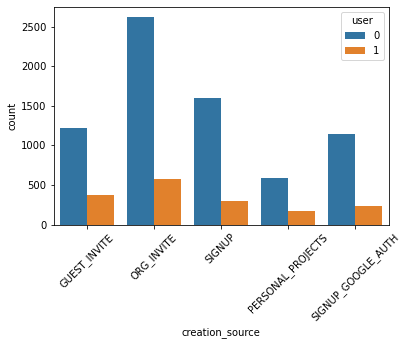

In [33]:
# Lets also check the impact of creation source on user adoption
sns.countplot(x='creation_source', hue='user', data = df)
plt.xticks(rotation = 45)
plt.show()